<a href="https://colab.research.google.com/github/VinayakBorhade/GoogleColabs/blob/master/SingleHiddenLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preproccessing Data**

In [0]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [0]:
train_labels=[]
train_samples=[]

Example Data:


*   An Experimental drug was tested on individuals from ages 13 to 100
*   The trial had 2100 participants. Half were under 65 years old, half were over 65 years old
*   95% of patients 65 years or older experienced side effects
*   95% of patients below age of 65 years experienced no side effects





In [0]:
for i in range(50):
  random_younger=randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)
  random_older=randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)
for i in range(1000):
  random_younger=randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)
  random_older=randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

In [0]:
#printing generated raw data
for i in train_samples:
  print(i)

In [0]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform((train_samples).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
#print scaled data
for i in scaled_train_samples:
  print(i)

# **Creating Neural Net**

In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [0]:
model=Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.3594 - acc: 0.9471 - val_loss: 0.0157 - val_acc: 1.0000
Epoch 2/20
 - 0s - loss: 0.3286 - acc: 0.9471 - val_loss: 0.0173 - val_acc: 1.0000
Epoch 3/20
 - 0s - loss: 0.3067 - acc: 0.9471 - val_loss: 0.0197 - val_acc: 1.0000
Epoch 4/20
 - 0s - loss: 0.2901 - acc: 0.9471 - val_loss: 0.0223 - val_acc: 1.0000
Epoch 5/20
 - 0s - loss: 0.2763 - acc: 0.9471 - val_loss: 0.0249 - val_acc: 1.0000
Epoch 6/20
 - 0s - loss: 0.2654 - acc: 0.9471 - val_loss: 0.0273 - val_acc: 1.0000
Epoch 7/20
 - 0s - loss: 0.2561 - acc: 0.9471 - val_loss: 0.0320 - val_acc: 1.0000
Epoch 8/20
 - 0s - loss: 0.2495 - acc: 0.9455 - val_loss: 0.0341 - val_acc: 1.0000
Epoch 9/20
 - 0s - loss: 0.2437 - acc: 0.9471 - val_loss: 0.0374 - val_acc: 1.0000
Epoch 10/20
 - 0s - loss: 0.2394 - acc: 0.9471 - val_loss: 0.0407 - val_acc: 1.0000
Epoch 11/20
 - 0s - loss: 0.2360 - acc: 0.9471 - val_loss: 0.0437 - val_acc: 1.0000
Epoch 12/20
 - 0s - loss: 0.2332 - acc

# **Generate Test Data**

In [0]:
test_labels=[]
test_samples=[]

In [0]:
for i in range(10):
  random_younger=randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)
  random_older=randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)
for i in range(200):
  random_younger=randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)
  random_older=randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)

In [0]:
test_samples=np.array(test_samples)
test_labels=np.array(test_labels)

In [29]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_test_samples=scaler.fit_transform((test_samples).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predict

In [0]:
predictions=model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [0]:
for i in predictions:
  print(i)

In [0]:
rounded_predictions=model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [0]:
for i in rounded_predictions:
  print(i)

# **Confusion Matrix**

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
cm=confusion_matrix(test_labels, rounded_predictions)

In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix without Normalization')
  
  print(cm)
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment='center', color='white' if cm[i, j]>thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')  

Confusion Matrix without Normalization
[[200  10]
 [ 10 200]]


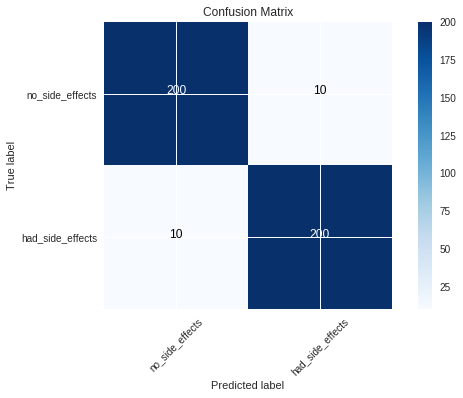

In [44]:
cm_plot_labels=['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# Save and Load Model

## **1. model.save()**

In [0]:
model.save("medical_trial_model.h5")

This function saves:


*   The architecture of model allowing to recreate the model
*   The weights of the model
*   The training configuration (loss, optimizer)
*   The state of the optimizer, allowing to resume training exactly where you left off





In [0]:
from keras.models import load_model
new_model=load_model("medical_trial_model.h5")

In [47]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [0]:
new_model.get_weights()

In [49]:
new_model.optimizer

## **2. model.to_json()**

If you only need to save the architecture of the model, and not its weights or training configuration, you can use the following function to save the architecture only.

In [0]:
json_string=model.to_json()

In [0]:
json_string

In [0]:
#model reconstruction from json
from keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [55]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# **3. model.save_weights()**

Only saves the weights of the model

In [0]:
model.save_weights("my_model_weights.h5")

In [0]:
model2=Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [0]:
model2.load_weights("my_model_weights.h5")